In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#NO PGE
def a_to_x_sub_ratio(h):
    return (4*h)/(1+(2*h))

def a_to_male_x_sub_ratio(h):
    return (4*h)/(3)

#f limited = 4/3

In [3]:
#PGE
def a_to_x_sub_ratio_pge(h):
    return (3*h)/(1+(2*h))

#m limited = h
    
#f limited = 1

In [4]:
h = np.linspace(0,1, 1000)

Text(0.5, 1.0, 'No PGE')

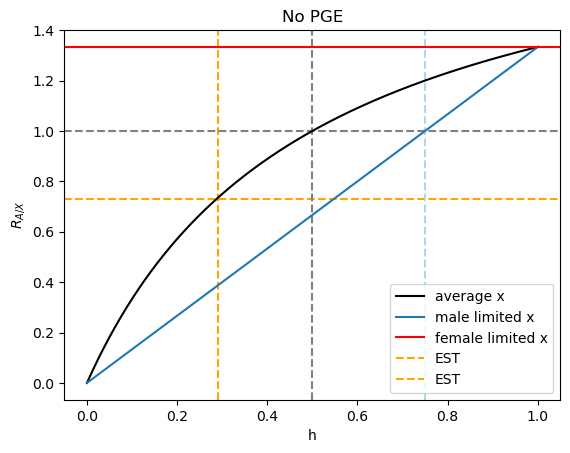

In [5]:
RX = a_to_x_sub_ratio(h)
RMX = a_to_male_x_sub_ratio(h)
sns.lineplot(x=h,
            y=RX,
            color='black',
            label='average x')
sns.lineplot(x=h,
            y=RMX,
            label='male limited x')
plt.axhline(4/3, color='red', label = 'female limited x')
#plt.axhline(0.87, linestyle='--', zorder=0, color='orange', label = 'EST')
#plt.axvline(0.38, linestyle='--', zorder=0, color='orange')
plt.axhline(0.73, linestyle='--', zorder=0, color='orange', label = 'EST')
plt.axvline(0.29, linestyle='--', zorder=0, color='orange', label = 'EST')
plt.axvline(x=0.5, linestyle='--', zorder=0, color='grey')
plt.axvline(x=0.75, linestyle='--', zorder=0, color='lightblue')
plt.xlabel('h')
plt.ylabel('$R_{A/X}$')
plt.axhline(y=1, linestyle='--', zorder=0, color='grey')
plt.legend(loc='lower right')
plt.title('No PGE')

Text(0.5, 1.0, 'PGE')

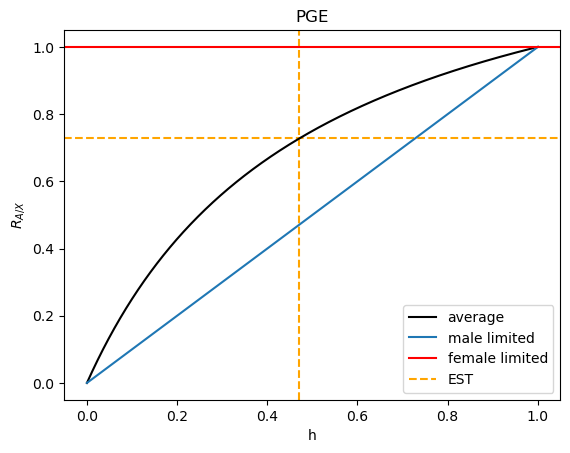

In [6]:
RX = a_to_x_sub_ratio_pge(h)
sns.lineplot(x=h,
            y=RX,
            color='black',
            label='average')
sns.lineplot(x=h,
            y=h,
            label='male limited')
plt.axhline(y=1, color='red', label = 'female limited')
#plt.axhline(y=1, linestyle='--', zorder=0, color='grey')
#plt.axvline(x=0.75, linestyle='--', zorder=0, color='grey')
#plt.axvline(x=0.4, linestyle='--', zorder=0, color='lightblue')
plt.xlabel('h')
plt.ylabel('$R_{A/X}$')
#plt.axhline(0.87, linestyle='--', zorder=0, color='orange', label = 'EST')
#plt.axvline(0.68, linestyle='--', zorder=0, color='orange')
plt.axhline(0.73, linestyle='--', zorder=0, color='orange', label = 'EST')
plt.axvline(0.47, linestyle='--', zorder=0, color='orange')
plt.legend(loc='lower right')
plt.title('PGE')

In [7]:
a_to_x_sub_ratio(0.29)

0.7341772151898733

In [8]:
np.exp(1)

2.718281828459045

In [9]:
N = 500000
x = np.linspace(0, 20*N)
y = (1/(4*N))*np.exp(-x/(4*N))

Text(0.5, 1.0, '$y=(1/4N) e^{-x/4N}$ for N = 500,000')

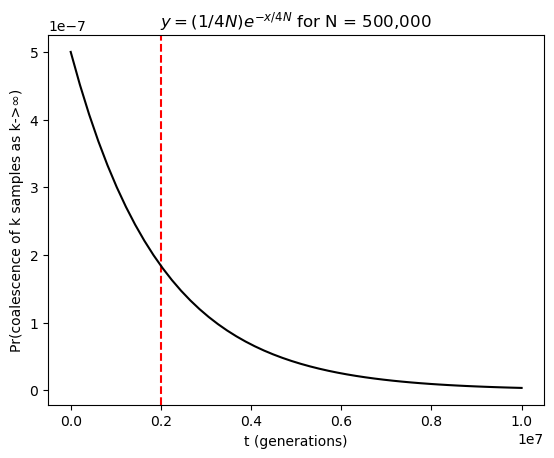

In [10]:
sns.lineplot(x = x,y = y, color='black')
plt.axvline(x=4*N, color='red',linestyle='--',zorder=1)
plt.xlabel('t (generations)')
plt.ylabel('Pr(coalescence of k samples as k->∞)')
plt.title('$y=(1/4N) e^{-x/4N}$ for N = 500,000')


Text(0.5, 1.0, 'TMRCA of 100 samples')

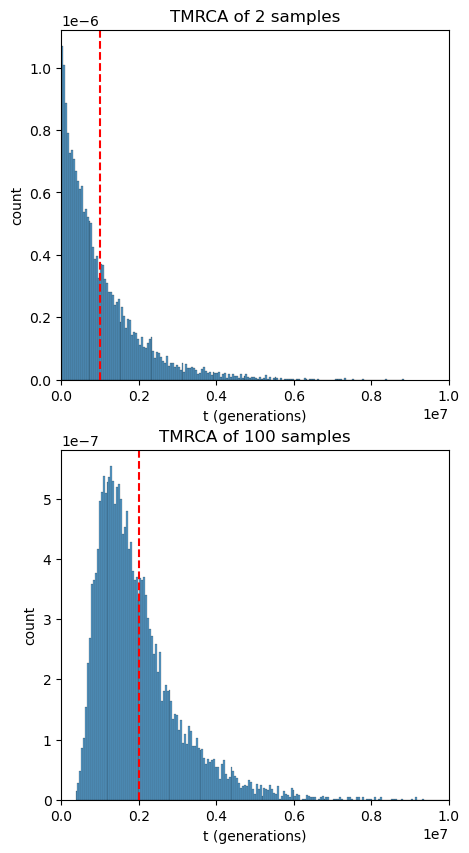

In [11]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (5,10))

def coaltimes(samplesize, Ne, replicates):
    list_of_coal_intervals = [np.random.exponential(2* Ne/int(i*(i-1)/2), replicates) for i in range(2,samplesize+1)]
    return np.asarray(list_of_coal_intervals)

n2 = axs[0]
n100 = axs[1]

coaltimes_array = coaltimes(2, 500_000, 10_000)
tmrca = sum(coaltimes_array)

n2 = sns.histplot(x = tmrca, stat = "density", binwidth = 50_000, ax = n2)
n2.set_xlabel("t (generations)");
n2.set_ylabel("count");
n2.axvline(x=2*N, color='red',linestyle='--',zorder=1)
n2.set_xlim([0, 1e7])
n2.set_title('TMRCA of 2 samples')

coaltimes_array = coaltimes(100, 500_000, 10_000)
tmrca = sum(coaltimes_array)

n100 = sns.histplot(x = tmrca, stat = "density", binwidth = 50_000, ax = n100)
n100.set_xlabel("t (generations)");
n100.set_ylabel("count");
n100.axvline(x=4*N, color='red',linestyle='--',zorder=1)
n100.set_xlim([0, 1e7])
n100.set_title('TMRCA of 100 samples')

<Axes: >

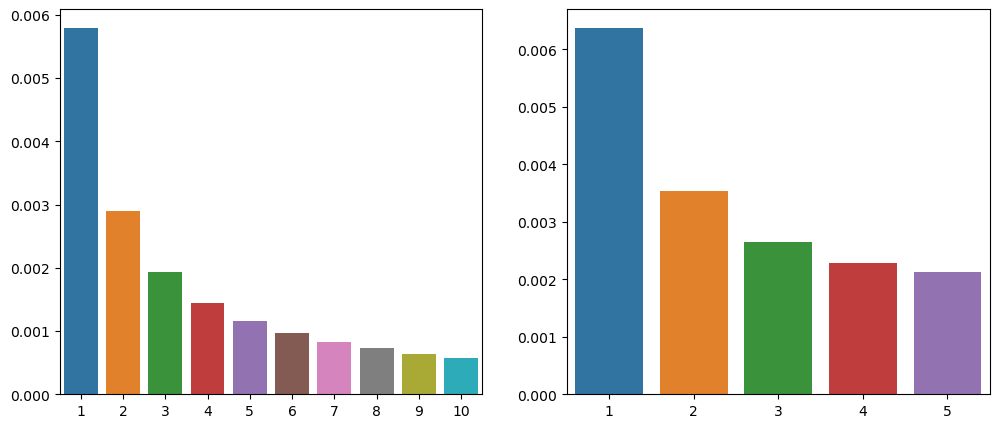

In [12]:
def s_i(Ne, u, i):
    return 4*Ne*u/i
def get_exp_sfs(Ne, u, n):
    sfs = [s_i(Ne, u, i+1) for i in range(n)]
    return np.asarray(sfs)

Ne = 500_000
u = 2.9e-9
n = 10

exp_unfold_sfs = get_exp_sfs(Ne, u, n)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
unfold_ax = axs[0]
fold_ax = axs[1]

sns.barplot(x = [i+1 for i in range(n)],
                    y = exp_unfold_sfs,
                    ax = unfold_ax)

exp_fold_sfs = np.asarray([exp_unfold_sfs[i] + exp_unfold_sfs[-(i+1)] for i in range(int(n/2))])

sns.barplot(x = [i+1 for i in range(int(n/2))],
                    y = exp_fold_sfs,
                    ax = fold_ax)